## Car Price Prediction

### Problem Statement

#### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and ####producing cars locally to give competition to their US and European counterparts.

#### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends.Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

##### - Which variables are significant in predicting the price of a car
##### - How well those variables describe the price of a car

#### Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

### Business Goal

#### You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

Step 1: Reading and Understanding the Data
Let's start with the following steps:

Importing data using the pandas library
Understanding the structure of the data

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


## Step 1: Reading and Understanding the Data
### Let's start with the following steps:

#### Importing data using the pandas library
#### Understanding the structure of the data

In [3]:
# Importing CarPrice_Assignment.csv
df = pd.read_csv('C://Users//mohit//Downloads//Mohit Data Science//linear regression//CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## We can say that there are no missing values 

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data
#### Let's now spend some time doing what is arguably the most important step - understanding the data.

#### If there is some obvious multicollinearity going on, this is the first place to catch it
#### Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### We'll visualise our data using matplotlib and seabor

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

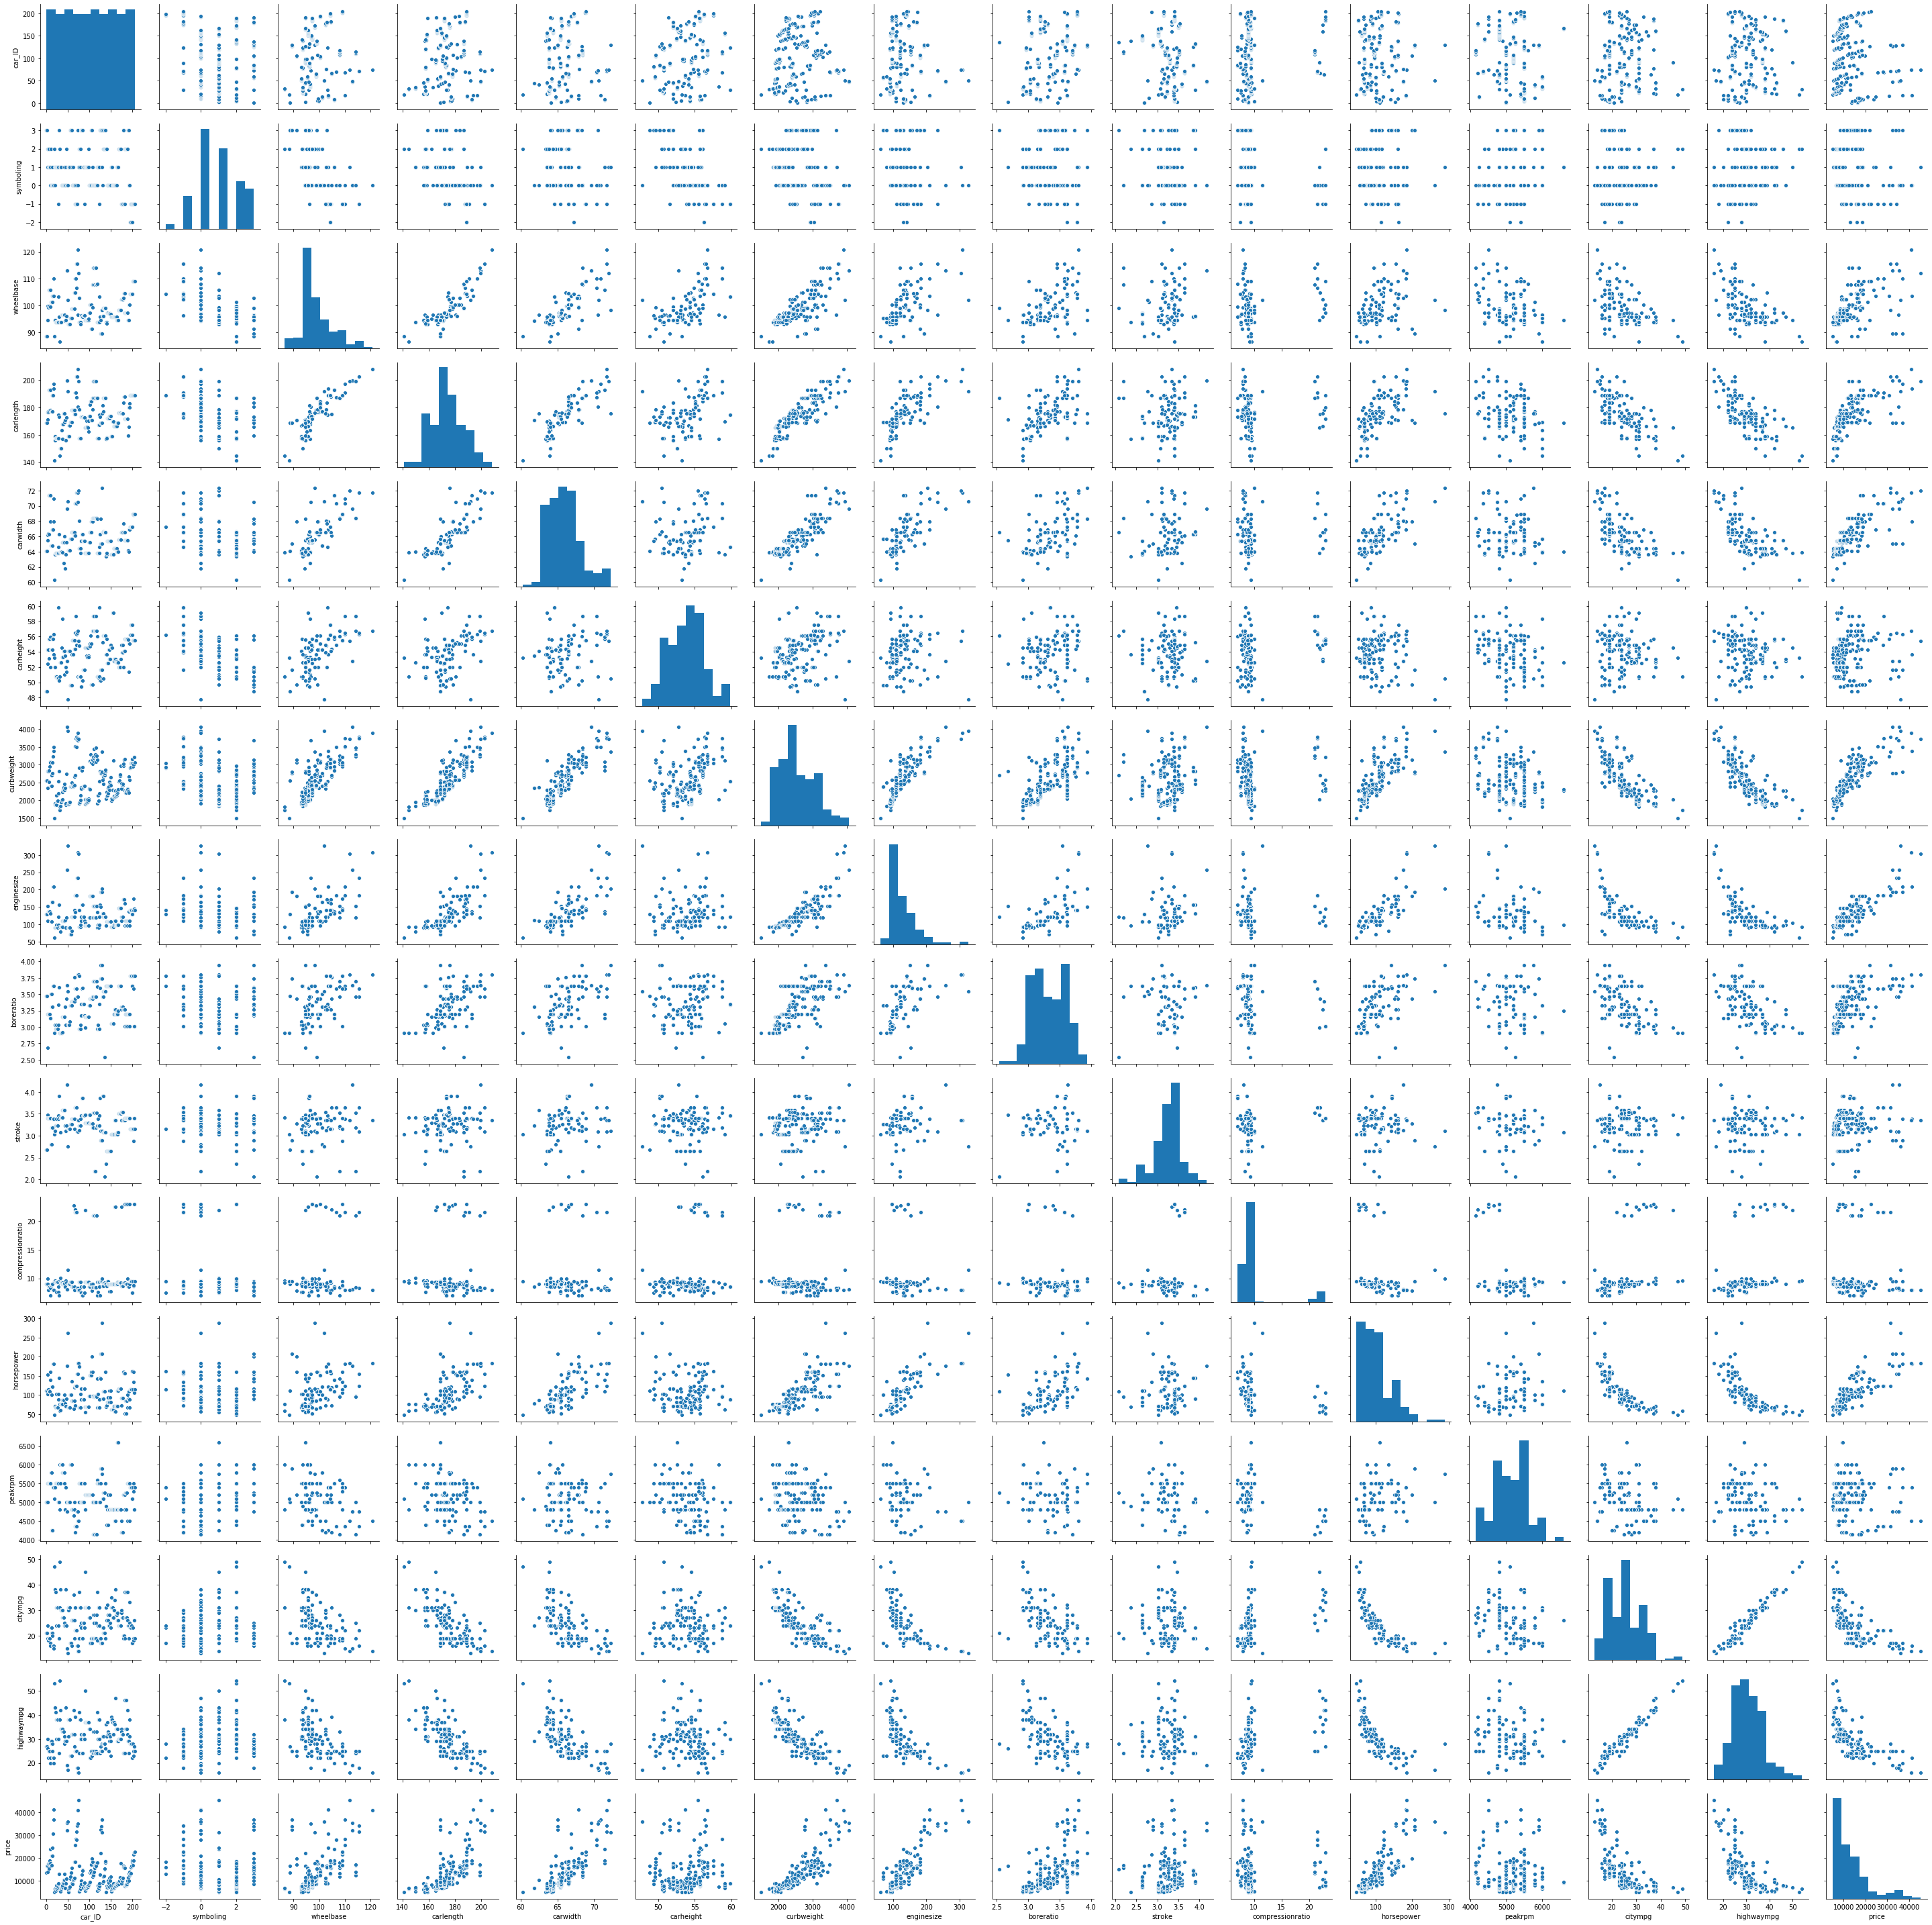

In [8]:
sns.pairplot(df)


#### carwidth, carlength and curbweight seems to have a poitive correlation with price.
#### carheight doesn't show any significant trend with price.

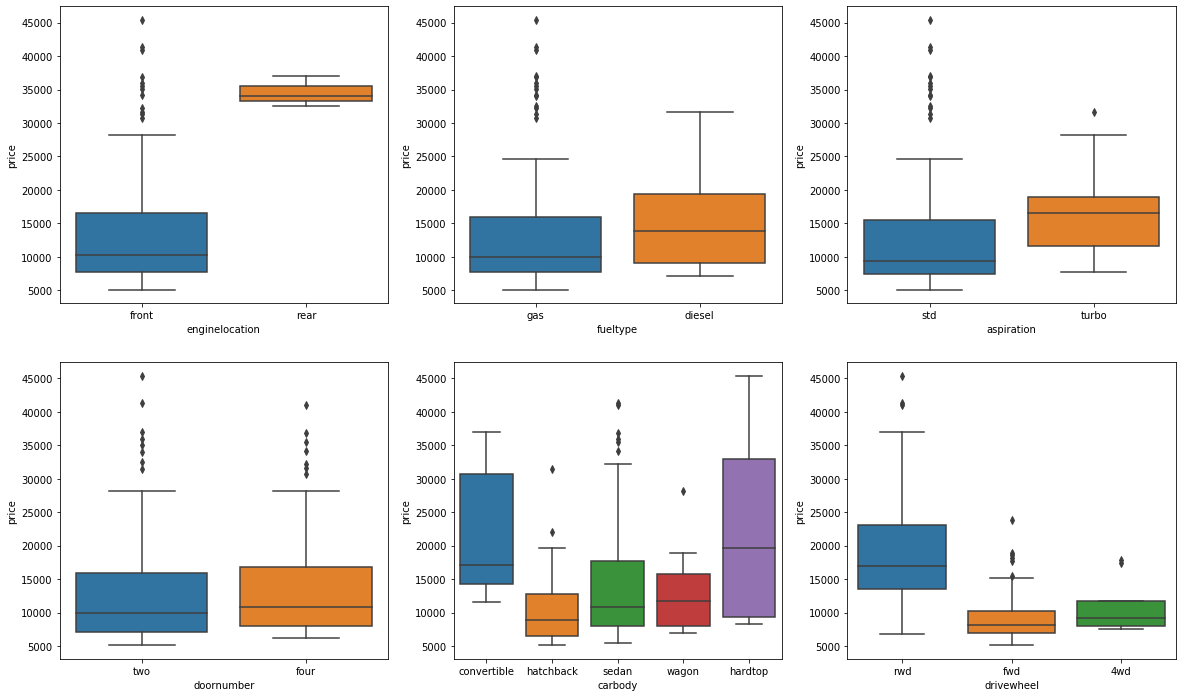

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.show()

### Inferences Keeping price as the dependent variable and other variables as independent  :

#### 1. Price of Cars with rear engine location is more compared to front.
#### 2.Diesel cars are more costlier.
#### 3.Price of cars with rwd  drivewheel is more compared to Fwd.

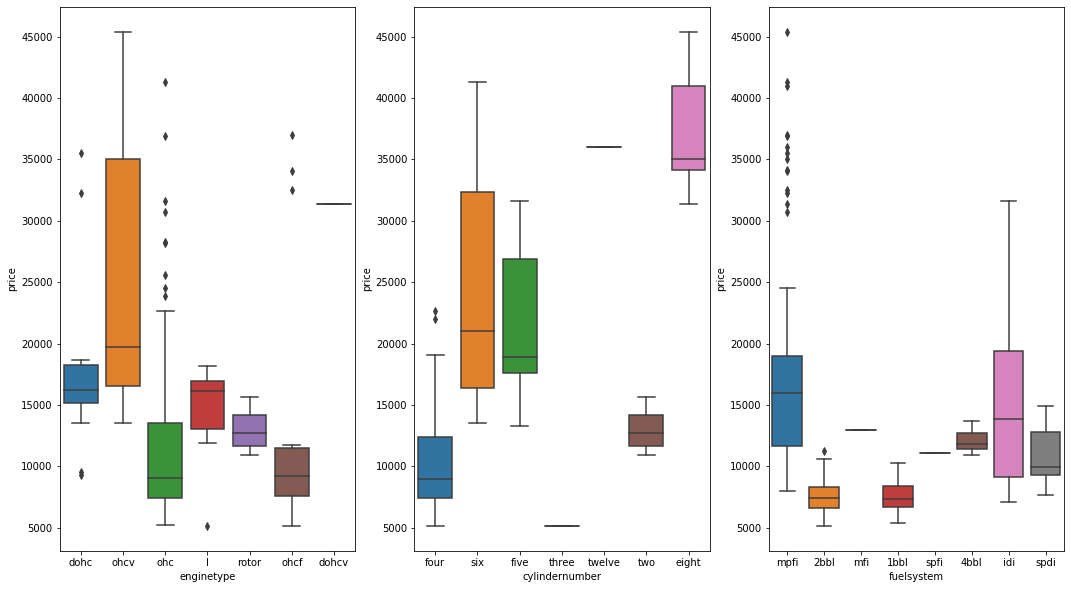

In [10]:
plt.figure(figsize=(18, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

plt.show()

 ### Inferences Keeping price as the dependent variable and other variables as independent  :
 
 #### Price of cars with OHCV (enginetype) , eight cylinder number and Idi fuel system is more.

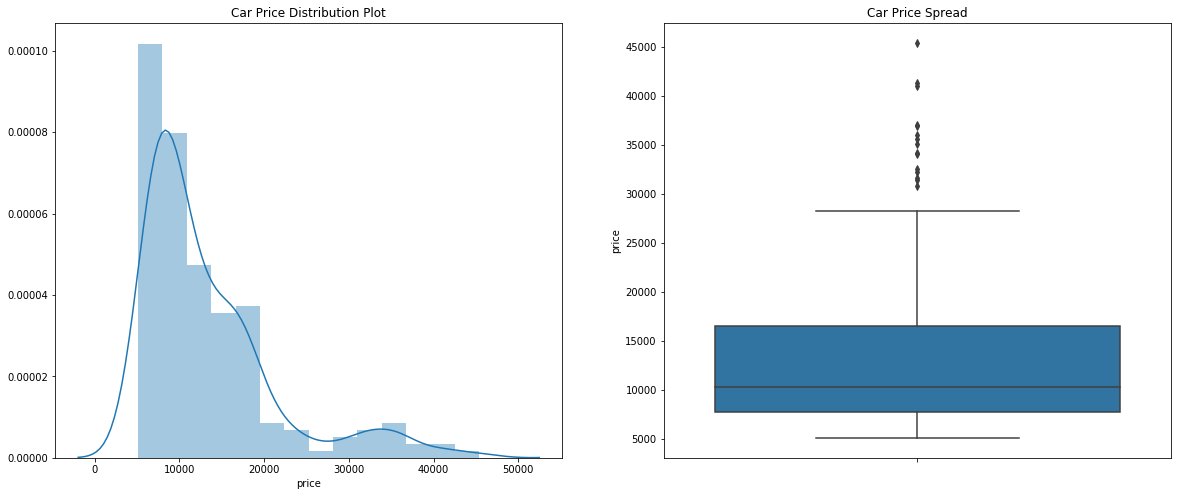

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

#### 1.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
#### 2. There is a significant difference between the mean and the median of the price distribution.
#### 3.The data points are far spread out from the mean, which indicates a high variance in the car prices.

There is a presence of outlier but we won't be treating it due to lack of data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Step 3: Data Preparation


#### Now we would be checking each columns individually and then treat them to use them for our linear model.
#### We have around 10-12 object variable so we need to convert them to numberical by using appropriate methods.


## CarName Column (creating dummy variable)

In [13]:
#Treating CaNarme model 

df['CarName']


0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [14]:
#Splitting company name from CarName column so as to focus the entries on the basis of company name


df['CarName']= df['CarName'].apply(lambda x : x.split(' ')[0])
df.head()




,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
# Correcting the name of the Car name as there is spelling mistakes in some of the entries because of which there is a increase in unique entries.
df['CarName']=df['CarName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
df['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181         toyota
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190     volkswagen
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

In [16]:
#Creating Dummy variable for CarName column

comp_name = pd.get_dummies(df['CarName'])
comp_name.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Adding comp_name to original dataset

df = pd.concat([df, comp_name], axis = 1)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#As we have dummy variables for this column so we can remove this column now.

df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#checking all columns to check there outputs so as to create more Dummy variables 
for i in df.columns:
    print(df[i].value_counts())

205    1
64     1
74     1
73     1
72     1
71     1
70     1
69     1
68     1
67     1
66     1
65     1
63     1
76     1
62     1
61     1
60     1
59     1
58     1
57     1
56     1
55     1
54     1
53     1
75     1
77     1
102    1
90     1
100    1
99     1
      ..
108    1
107    1
106    1
105    1
127    1
128    1
129    1
130    1
151    1
150    1
149    1
148    1
147    1
146    1
145    1
144    1
143    1
142    1
141    1
140    1
139    1
138    1
137    1
136    1
135    1
134    1
133    1
132    1
131    1
1      1
Name: car_ID, Length: 205, dtype: int64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: d

#### You can see that your dataset has many columns with two outputs.

#### But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'output1' and 0 is a 'output2'.

### columns treating here are fueltype , aspiration, doornumber and enginelocation

In [20]:
varlist=['fueltype']

def binary_map(x):
    return x.map({'gas': 1, "diesel": 0})

# Applying the function to the df list
df[varlist] = df[varlist].apply(binary_map)

In [21]:
varlist1=['aspiration']

def binary_map(x):
    return x.map({'std': 1, "turbo": 0})

# Applying the function to the df list
df[varlist1] = df[varlist1].apply(binary_map)

In [22]:
varlist2=['doornumber']

def binary_map(x):
    return x.map({'four': 1, "two": 0})

# Applying the function to the df list
df[varlist2] = df[varlist2].apply(binary_map)

In [23]:
varlist3=['enginelocation']

def binary_map(x):
    return x.map({'front': 1, "rear": 0})

# Applying the function to the df list
df[varlist3] = df[varlist3].apply(binary_map)

In [24]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,1,1,0,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,0,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,0,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,1,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,1,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


## Carbody (creating dummy variable )

In [25]:
carbody = pd.get_dummies(df['carbody'])

In [26]:

carbody.head()






,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


Now, you don't need five columns. You can drop the convertible column, as the type of carbody can be identified with just the last four columns where —

0000 will correspond to convertible
1000 will correspond to hardtop
0100 will correspond to hatchback
0010 will correspond to sedan
0001 will correspond to wagon


In [27]:
carbody = pd.get_dummies(df['carbody'], drop_first = True)

In [28]:
 #Add the results to the original df dataframe

df = pd.concat([df, carbody], axis = 1)


In [29]:
# Drop 'carbody' as we have created the dummies for it

df.drop(['carbody'], axis = 1, inplace = True)


In [30]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,1,3,1,1,0,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,0,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,0,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,1,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,5,2,1,1,1,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


## drivewheel ( creating dummy variable )

In [31]:
drivewheel = pd.get_dummies(df['drivewheel'])

In [32]:
drivewheel.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


Now, you don't need three columns. You can drop the 4wd column, as the type of drivewheel can be identified with just the last two columns where —

00 will correspond to 4wd

10 will correspond to fwd

01 will correspond to rwd




In [33]:
drivewheel = pd.get_dummies(df['drivewheel'], drop_first = True)

In [34]:
#Add the results to the original df dataframe

df = pd.concat([df, drivewheel], axis = 1)


In [35]:
# Drop 'drivewheel' as we have created the dummies for it

df.drop(['drivewheel'], axis = 1, inplace = True)


In [36]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
1,2,3,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
2,3,1,1,1,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,4,2,1,1,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,1,0,1,0
4,5,2,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,1,0,0,0


## symboling ( create dummy variable)

In [37]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [38]:
symboling = pd.get_dummies(df['symboling'])

In [39]:
symboling.head()


,-2,-1,0,1,2,3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [40]:
symboling=symboling.rename(columns={-2:"sym(-2)",-1:"sym(-1)",0:"sym(0)",1:"sym(1)",2:"sym(2)",3:"sym(-3)"})#renaming columns as sym(x) for better understanding


In [41]:
symboling.head()

,sym(-2),sym(-1),sym(0),sym(1),sym(2),sym(-3)
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


Now, you don't need six columns. You can drop the sum(-2) column, as the type of symboling can be identified with just the last five columns where —

00000 will correspond to sym(-2)

10000 will correspond to sym(-1)

01000 will correspond to sym(0)

00100 will correspond to sym(1)

00010 will correspond to sym(2)

00001 will correspond to sym(3)


In [42]:
symboling.drop(['sym(-2)'],axis=1,inplace=True)
#Add the results to the original df dataframe

df = pd.concat([df, symboling], axis = 1)
# Drop 'drivewheel' as we have created the dummies for it

df.drop(['symboling','car_ID'], axis = 1, inplace = True)
df.head()



,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,hatchback,sedan,wagon,fwd,rwd,sym(-1),sym(0),sym(1),sym(2),sym(-3)
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,dohc,...,0,0,0,0,1,0,0,0,0,1
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,dohc,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,ohcv,...,1,0,0,0,1,0,0,1,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,ohc,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,ohc,...,0,1,0,0,0,0,0,0,1,0


## EngineType (creating Dummy Variable )

In [43]:
enginet = pd.get_dummies(df['enginetype'])
enginet.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


Now, you don't need seven columns. You can drop the dohc column, as the type of engine type can be identified with just the last six columns where —

000000 will correspond to dohc

100000 will correspond to dohcv

010000 will correspond to I

001000 will correspond to ohc

000100 will correspond to ohcf

000010 will correspond to ohcv

000001 will correspond to rotor

In [44]:
enginet = pd.get_dummies(df['enginetype'], drop_first = True)
df = pd.concat([df, enginet], axis = 1)
# Drop 'drivewheel' as we have created the dummies for it

df.drop(['enginetype'], axis = 1, inplace = True)
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,sym(0),sym(1),sym(2),sym(-3),dohcv,l,ohc,ohcf,ohcv,rotor
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,four,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,four,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,six,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,four,...,0,0,1,0,0,0,1,0,0,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,five,...,0,0,1,0,0,0,1,0,0,0


## cylindernumber(creating Dummy Variable)

In [45]:
cylno = pd.get_dummies(df['cylindernumber'])
cylno.head()


,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [46]:
cylno=cylno.rename(columns={'four':"cylno(four)",'six':"cylno(six)",'five':"cylno(five)",'three':"cylno(three)",'twelve':"cylno(twelve)",'two':"cylno(two)",'eight':'cylno(eight)'})#renaming columns as cylno(x) for better understanding
cylno.head()


,cylno(eight),cylno(five),cylno(four),cylno(six),cylno(three),cylno(twelve),cylno(two)
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


Now, you don't need seven columns. You can drop the cylno(eight) column, as the type of cylinder number  can be identified with just the last six columns where —

000000 will correspond to cylno(eight

100000 will correspond to dohcv

010000 will correspond to I

001000 will correspond to ohc

000100 will correspond to ohcf

000010 will correspond to ohcv

000001 will correspond to rotor

In [47]:
cylno.drop(['cylno(eight)'],axis=1,inplace=True)
#Add the results to the original df dataframe

df = pd.concat([df, cylno], axis = 1)
# Drop 'drivewheel' as we have created the dummies for it

df.drop(['cylindernumber'], axis = 1, inplace = True)
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,ohc,ohcf,ohcv,rotor,cylno(five),cylno(four),cylno(six),cylno(three),cylno(twelve),cylno(two)
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,1,0,0,0,1,0,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,1,0,0,0,0,1,0,0,0,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,1,0,0,0,1,0,0,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
alfa-romero         205 non-null uint8
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               

## Fuelsystem ( Creating Dummy Variable )

In [49]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [50]:
fuelsys = pd.get_dummies(df['fuelsystem'])
fuelsys.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


Now, you don't need eight columns. You can drop the 1bbl column, as the type of fuel ysystem can be identified with just the last seven columns where —

0000000 will correspond to 1bbl

1000000 will correspond to 2bbl

0100000 will correspond to 4bbl

0010000 will correspond to idi

0001000 will correspond to mfi

0000100 will correspond to mpfi

0000010 will correspond to spdi

0000001 will correspond to spfi


In [51]:
fuelsys.drop(['1bbl'],axis=1,inplace=True)
#Add the results to the original df dataframe

df = pd.concat([df, fuelsys], axis = 1)
# Drop 'fuelsysytem' as we have created the dummies for it

df.drop(['fuelsystem'], axis = 1, inplace = True)
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylno(three),cylno(twelve),cylno(two),2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,1,0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
alfa-romero         205 non-null uint8
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               205 non-null uint8
chevrolet           2

### Step 4: Splitting the Data into Training and Testing Sets
#### As you know, the first basic step for regression is performing a train-test split.

In [53]:
from sklearn.model_selection import train_test_split


# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

###  performing minmax scaling 

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','price','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [57]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylno(three),cylno(twelve),cylno(two),2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,0,1,0,0,0,0,0,0
125,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,0,0,0,0,1,0,0
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,0,0,1,0,0
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylno(three),cylno(twelve),cylno(two),2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


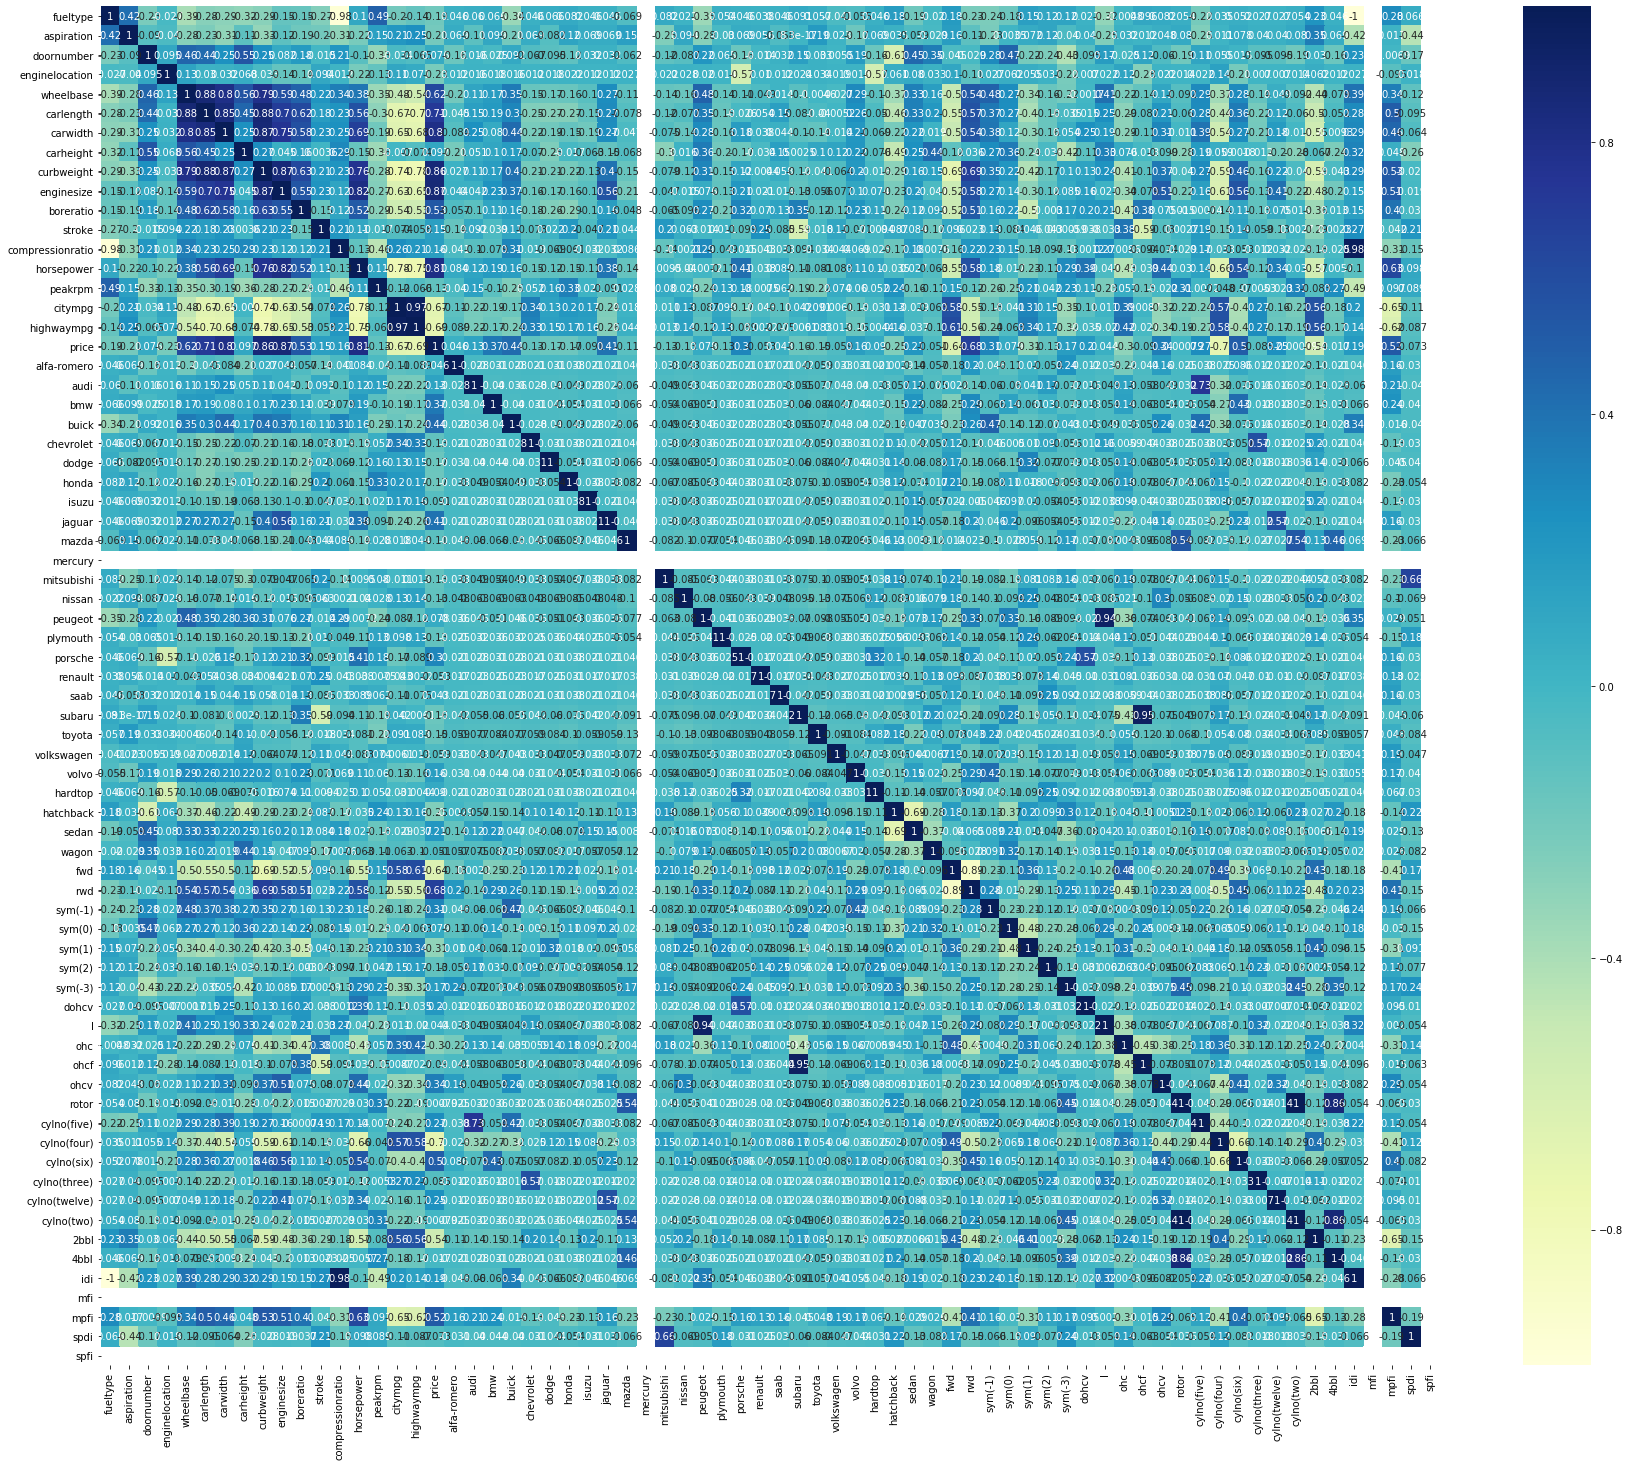

In [59]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.



### Dividing into X and Y sets for the model building

In [60]:
y_train = df_train.pop('price')
X_train = df_train

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 24),
 ('aspiration', False, 14),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 35),
 ('highwaympg', False, 27),
 ('alfa-romero', False, 40),
 ('audi', False, 36),
 ('bmw', True, 1),
 ('buick', False, 44),
 ('chevrolet', False, 23),
 ('dodge', False, 20),
 ('honda', False, 22),
 ('isuzu', False, 52),
 ('jaguar', False, 28),
 ('mazda', False, 50),
 ('mercury', False, 58),
 ('mitsubishi', False, 13),
 ('nissan', False, 49),
 ('peugeot', False, 6),
 ('plymouth', False, 19),
 ('porsche', True, 1),
 ('renault', False, 38),
 ('saab', False, 9),
 ('subaru', False, 11),
 ('toyota', False, 57),
 ('volkswagen', False, 51),
 ('volvo', False, 8),
 ('hardtop', 

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'bmw', 'porsche', 'rotor', 'cylno(three)', 'cylno(twelve)'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'alfa-romero', 'audi', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'sym(-1)', 'sym(0)', 'sym(1)', 'sym(2)', 'sym(-3)', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'cylno(five)', 'cylno(four)', 'cylno(six)',
       'cylno(two)', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [66]:
# Creating train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### MODEL 1

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.21e-64
Time:                        23:00:08   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1704      0.084      2.

`cyclo(twelve)` is insignificant in presence of other variables; can be dropped

In [70]:
X_train_new = X_train_rfe.drop(["cylno(twelve)"], axis = 1)

### Model 2

In [71]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [72]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [73]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.18e-65
Time:                        23:00:08   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

####  P value of all variables look significant now  so let's check the VIF

In [74]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'bmw', 'porsche', 'rotor', 'cylno(three)'],
      dtype='object')

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.54
3,curbweight,8.64
4,enginesize,5.13
2,carwidth,4.91
5,boreratio,1.85
7,porsche,1.80
1,enginelocation,1.65
8,rotor,1.17
6,bmw,1.09
9,cylno(three),1.05


#### We can keep a variable in a model if it's VIF is less than 5 
#### Droping Curbweight as it have 8.64 VIF

In [76]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

### MODEL 3

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [78]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [79]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.01e-63
Time:                        23:00:08   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1849      0.088      2.

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,228.38
3,enginesize,3.12
2,carwidth,3.08
4,boreratio,1.70
6,porsche,1.67
1,enginelocation,1.64
7,rotor,1.14
5,bmw,1.09
8,cylno(three),1.05


#### We can see that P value of variable boreratio(pvalue : 0.077) is more than the significance level 5% so droping this variable 

In [81]:
X_train_new = X_train_new.drop(['boreratio'], axis=1)

### MODEL 4

In [82]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [83]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [84]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.04e-64
Time:                        23:00:09   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1702      0.089      1.

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,226.38
3,enginesize,3.02
2,carwidth,2.86
1,enginelocation,1.64
5,porsche,1.59
6,rotor,1.13
4,bmw,1.09
7,cylno(three),1.05


#### We can see that the Pvalue of Porsche is 0.118 which is more than the significance level so droping it.

In [86]:
X_train_new = X_train_new.drop(['porsche'], axis=1)

### MODEL 5

In [87]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [88]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [89]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.62e-64
Time:                        23:00:09   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2478      0.074      3.

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,156.08
3,enginesize,3.02
2,carwidth,2.75
5,rotor,1.12
4,bmw,1.09
1,enginelocation,1.08
6,cylno(three),1.05


#### now Vif and P values of all variables are good for the model.


### Residual Analysis of the train data
#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

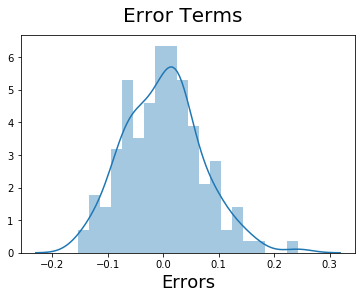

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.



### Making Predictions
#### Applying the scaling on the test sets¶

In [93]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','price','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylno(three),cylno(twelve),cylno(two),2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,...,0,0,0,1,0,0,0,0,0,0
186,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,...,0,0,0,0,0,0,0,1,0,0
59,1,1,0,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,...,0,0,0,1,0,0,0,0,0,0
165,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,...,0,0,0,0,0,0,0,1,0,0
140,1,1,0,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,...,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test


In [94]:
y_test = df_test.pop('price')
X_test = df_test

In [95]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [96]:
y_pred = lm.predict(X_test_new)


#### Evaluation of test via comparison of y_pred and y_test¶


In [97]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)


0.9013443522816859

Text(0, 0.5, 'y_pred')

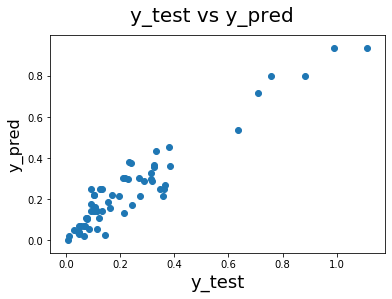

In [98]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [99]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.62e-64
Time:                        23:00:14   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2478      0.074      3.

### Inference :
#### 1. R-sqaured and Adjusted R-squared (extent of fit) - 0.897 and 0.892 - 90% variance explained.
#### 2. F-stats and Prob(F-stats) (overall model fit) - 197.0 and 1.62e-64(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
#### 3.p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.